In [65]:
## importo todas las librerias aquí
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

In [66]:
%matplotlib inline

In [67]:
from sklearn import preprocessing

## medias anuales PRECIPITACIONES

In [69]:
##CARGO EL DATAFRAME
### como están en la carpeta anterior, tengo que subir 1 nivel (..\) para acceder a los cvs que haya creado
precip_all = pd.read_csv("..\precip_all.csv")
precip_all.head(10)

,Indicativo,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,media anual,Tipo
0,3191E,COLMENAR VIEJO/FAMET,34.7,2.2,16.3,97.0,0.8,2.1,2.0,13.2,42.5,30.0,60.1,112.4,34.44,P_MES
1,3129,MADRID/BARAJAS,18.2,0.5,12.7,81.5,0.0,2.4,17.1,44.4,37.9,33.1,30.7,57.7,28.02,P_MES
2,3196,MADRID/CUATRO VIENTOS,19.3,0.7,7.5,71.7,0.5,0.7,9.6,52.3,47.9,39.1,38.2,81.6,30.76,P_MES
3,3200,MADRID/GETAFE,14.0,1.8,9.1,70.4,1.1,1.0,2.5,33.2,31.3,40.3,39.9,101.6,28.85,P_MES
4,3195,"MADRID,RETIRO",18.6,1.0,9.8,83.2,0.1,2.0,8.6,58.4,33.1,42.6,44.0,90.1,32.62,P_MES
5,3175,MADRID/TORREJÓN,14.6,0.5,10.2,75.2,0.0,2.1,9.6,15.7,45.9,26.8,29.4,52.9,23.58,P_MES
6,2462,"NAVACERRADA,PUERTO",153.3,14.2,44.0,153.4,5.6,8.3,11.2,45.6,71.6,103.6,313.5,229.1,96.12,P_MES
7,3191E,COLMENAR VIEJO/FAMET,10.8,2.0,13.2,27.5,0.3,2.1,1.4,9.5,20.0,9.4,21.7,70.7,15.72,P_MAX
8,3129,MADRID/BARAJAS,7.4,0.5,12.1,27.9,0.0,2.4,10.4,33.3,14.1,12.1,7.3,26.0,12.79,P_MAX
9,3196,MADRID/CUATRO VIENTOS,7.2,0.7,6.9,27.9,0.5,0.7,5.0,45.9,26.2,19.0,6.0,34.5,15.04,P_MAX


In [70]:
## estas son las medias anuales de cada uno de los datos de precipitaciones
df_medias= precip_all.groupby("Tipo")["media anual"].mean()
df_medias = pd.DataFrame(df_medias)
df_medias

,media anual
Tipo,
NP_001,6.691429
NP_010,4.738571
NP_100,1.167143
NP_300,0.142857
P_MAX,15.287143
P_MES,39.198571


In [71]:
#estos son los valores estadísticos de  cada uno de los datos de precipitaciones
df_statistics= precip_all.groupby("Tipo")["media anual"].describe()
df_statistics

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
NP_001,7.0,6.691429,1.520915,5.50,5.835,6.25,6.75,9.92
NP_010,7.0,4.738571,1.619212,3.67,3.875,3.92,4.79,8.25
NP_100,7.0,1.167143,1.013570,0.42,0.750,0.83,1.00,3.42
NP_300,7.0,0.142857,0.135734,0.00,0.080,0.08,0.17,0.42
P_MAX,7.0,15.287143,5.232589,11.26,12.500,13.37,15.38,26.62
P_MES,7.0,39.198571,25.341577,23.58,28.435,30.76,33.53,96.12


In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
##normalizo los valores para verlos bien en un gráfico  -->finalmente no me interesan los valores normalizados, ya que para ese gráfico he quitado
# las 2 variables que se median en mm y he dejado todas las de nºdías, y esos valores no están tan alejados como para necesitar una normalización
transformed_df_statistics = scaler.fit_transform(df_statistics)
transformed_df_statistics = pd.DataFrame(transformed_df_statistics)
transformed_df_statistics.columns = df_statistics.columns
transformed_df_statistics

,count,mean,std,min,25%,50%,75%,max
0,0.0,0.167673,0.054955,0.233249,0.202962,0.201108,0.197242,0.099269
1,0.0,0.117671,0.058855,0.155640,0.133839,0.125163,0.138489,0.081818
2,0.0,0.026226,0.034827,0.017812,0.023629,0.024446,0.024880,0.031348
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.387761,0.202209,0.477523,0.438018,0.433181,0.455935,0.273772
5,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
#quiero añadirle la columna Tipo pero no me queda mas remedio que hacerlo manualmente, ya que con el groupby se han puesto en orden alfabetico y no se como mas hacerlo
transformed_df_statistics["Tipo"] = pd.DataFrame(["NP_001", "NP_010", "NP_100", "NP_300", "P_MAX", "P_MES"])
transformed_df_statistics

,count,mean,std,min,25%,50%,75%,max,Tipo
0,0.0,0.167673,0.054955,0.233249,0.202962,0.201108,0.197242,0.099269,NP_001
1,0.0,0.117671,0.058855,0.155640,0.133839,0.125163,0.138489,0.081818,NP_010
2,0.0,0.026226,0.034827,0.017812,0.023629,0.024446,0.024880,0.031348,NP_100
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NP_300
4,0.0,0.387761,0.202209,0.477523,0.438018,0.433181,0.455935,0.273772,P_MAX
5,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,P_MES


In [76]:
precip_all["Tipo"].unique()  ##esto era para ver si lo podia añadir desde este df pero no, porque el orden es distinto

array(['P_MES', 'P_MAX', 'NP_001', 'NP_010', 'NP_100', 'NP_300'],
      dtype=object)

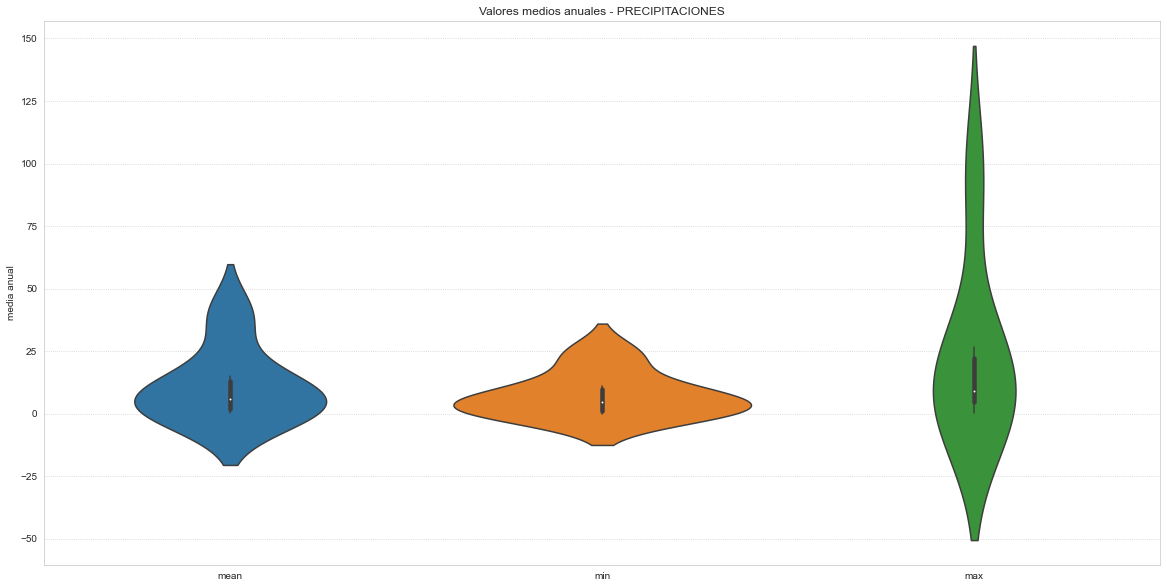

In [77]:
# intento hacer un violinplot --->con valores no normalizados
# fondo del gráfico
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": ":"})

fig = plt.figure(figsize=(20,10))
ax = plt.axes()

ax = sns.violinplot(data=df_statistics[["mean","min","max"]])

ax.set_ylabel("media anual")
ax.set_title("Valores medios anuales - PRECIPITACIONES");

##no lo he guardado aun, no sé si me quedo con éste o con él de las pelotitas mas abajo



<AxesSubplot:>

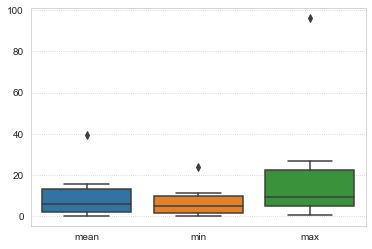

In [79]:
##sale igual de mal. Pruebo con un scatterplot
sns.boxplot( data=df_statistics[["mean","min","max"]]) 
# sns.boxplot( data=df_medias.iloc[:-2]) 

#de todos los valores de precipitaciones, no normalizados
##no he guardado aun el gráfico, creo que finalmente me quedaré con él de pelotitas


In [80]:
df_medias.iloc[-2:]

,media anual
Tipo,
P_MAX,15.287143
P_MES,39.198571


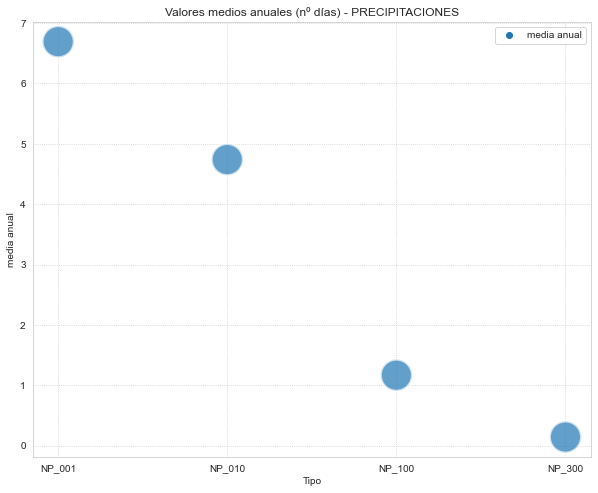

In [81]:
# mejor con el scatterplot,lo unico qeu queria era que se vieran los valores medios (anuales) de cada variable

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("media anual")
ax.set_title("Valores medios anuales (nº días) - PRECIPITACIONES");

# sns.scatterplot(x=transformed_df_statistics["Tipo"], y=transformed_df_statistics["mean"], marker= "o", s= 1000, color="dodgerblue", alpha=0.7 );
sns.scatterplot(data= df_medias.iloc[:-2], marker= "o", s= 1000, color="dodgerblue", alpha=0.7 );



### OK, este me vale, es SOLO considerando los NP_... (nº dias de lluvia en determinados contextos)

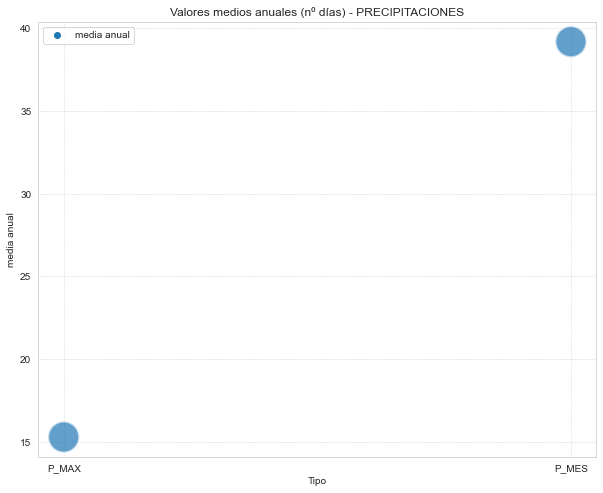

In [82]:
# para las conclusiones finales, mejor las medias anuales de la precipitación total y precipitación másima en mm
## mejor el grafico mas abajo, donde incluyo tambien los valores min y max

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_ylabel("media anual")
ax.set_title("Valores medios anuales (nº días) - PRECIPITACIONES");

# sns.scatterplot(x=transformed_df_statistics["Tipo"], y=transformed_df_statistics["mean"], marker= "o", s= 1000, color="dodgerblue", alpha=0.7 );
sns.scatterplot(data= df_medias.iloc[-2:], marker= "o", s= 1000, color="dodgerblue", alpha=0.7 );



### OK, este me vale, es SOLO considerando los NP_... (nº dias de lluvia en determinados contextos)

In [83]:
### ESTO NO ME VALE, QUERIA VALORES ÚNICOS DE CADA VARIABLE, como he hecho aquí arriba
# # voy a hacer el mismo scatter plot pero de los valores originales, sin normalizar)

# fig = plt.figure(figsize=(10,8))
# ax = plt.axes()

# ax.set_title("Valores medios anuales - PRECIPITACIONES");

# sns.scatterplot(x=precip_all["Tipo"], y=precip_all["media anual"], marker= "o", s= 100, color="dodgerblue", alpha=0.5 );

# ## NO lo guardo este gráfico


In [84]:
df_statistics

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
NP_001,7.0,6.691429,1.520915,5.50,5.835,6.25,6.75,9.92
NP_010,7.0,4.738571,1.619212,3.67,3.875,3.92,4.79,8.25
NP_100,7.0,1.167143,1.013570,0.42,0.750,0.83,1.00,3.42
NP_300,7.0,0.142857,0.135734,0.00,0.080,0.08,0.17,0.42
P_MAX,7.0,15.287143,5.232589,11.26,12.500,13.37,15.38,26.62
P_MES,7.0,39.198571,25.341577,23.58,28.435,30.76,33.53,96.12


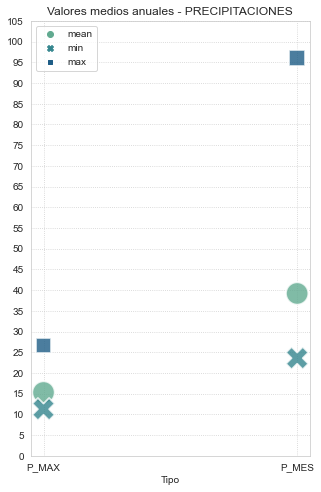

In [85]:
# scatter plot, me quedo con la media, min, max

fig = plt.figure(figsize=(5,8))
ax = plt.axes()

ax.set_title("Valores medios anuales - PRECIPITACIONES");

ticks = range(0, 110, 5)

sns.scatterplot(data=df_statistics.iloc[-2:][["mean","min","max"]], palette="crest", marker= "o", s= 500, alpha=0.8 );

plt.yticks(ticks)
plt.legend(loc="upper left");

##me quedo con este, respecto a las precipitaciones

## medias anuales OCURRENCIAS METEOROS

In [88]:
##CARGO EL DATAFRAME
meteor_all = pd.read_csv("..\meteor_all.csv")
meteor_all.head(10)

,Indicativo,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,media anual,Tipo
0,3191E,COLMENAR VIEJO/FAMET,4.0,0.0,3.0,13.0,3.0,1.0,4.0,7.0,7.0,10.0,21.0,13.0,7.17,N_LLU
1,3129,MADRID/BARAJAS,4.0,1.0,2.0,12.0,3.0,1.0,5.0,4.0,4.0,9.0,16.0,12.0,6.08,N_LLU
2,3196,MADRID/CUATRO VIENTOS,5.0,1.0,2.0,12.0,1.0,1.0,6.0,3.0,6.0,12.0,19.0,13.0,6.75,N_LLU
3,3200,MADRID/GETAFE,4.0,1.0,3.0,15.0,3.0,1.0,6.0,4.0,5.0,10.0,18.0,12.0,6.83,N_LLU
4,3195,"MADRID,RETIRO",5.0,1.0,2.0,13.0,1.0,1.0,3.0,4.0,5.0,10.0,17.0,12.0,6.17,N_LLU
5,3175,MADRID/TORREJÓN,4.0,1.0,3.0,11.0,2.0,1.0,4.0,2.0,7.0,10.0,16.0,13.0,6.17,N_LLU
6,2462,"NAVACERRADA,PUERTO",2.0,1.0,3.0,7.0,5.0,4.0,9.0,7.0,11.0,8.0,11.0,9.0,6.42,N_LLU
7,3191E,COLMENAR VIEJO/FAMET,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33,N_NIE
8,3129,MADRID/BARAJAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,N_NIE
9,3196,MADRID/CUATRO VIENTOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,N_NIE


In [89]:
#estos son los valores estadísticos de  cada uno de los datos de precipitaciones
df_statistics_met= meteor_all.groupby("Tipo")["media anual"].describe()
df_statistics_met

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
N_CUB,7.0,5.045714,2.194143,4.00,4.075,4.17,4.500,10.00
N_DES,7.0,8.872857,1.399401,6.42,8.250,8.83,9.970,10.42
N_FOG,7.0,2.321429,3.930600,0.17,0.540,0.58,1.670,11.08
N_GRA,7.0,0.225714,0.183744,0.00,0.125,0.25,0.250,0.58
N_LLU,7.0,6.512857,0.412259,6.08,6.170,6.42,6.790,7.17
N_NIE,7.0,0.808571,1.997552,0.00,0.000,0.00,0.165,5.33
N_NUB,7.0,16.497143,1.450973,14.00,15.990,16.17,17.500,18.33
N_TOR,7.0,1.011429,0.112610,0.83,0.960,1.00,1.080,1.17


In [90]:
df_statistics_met[["mean","min","max"]]

,mean,min,max
Tipo,,,
N_CUB,5.045714,4.00,10.00
N_DES,8.872857,6.42,10.42
N_FOG,2.321429,0.17,11.08
N_GRA,0.225714,0.00,0.58
N_LLU,6.512857,6.08,7.17
N_NIE,0.808571,0.00,5.33
N_NUB,16.497143,14.00,18.33
N_TOR,1.011429,0.83,1.17


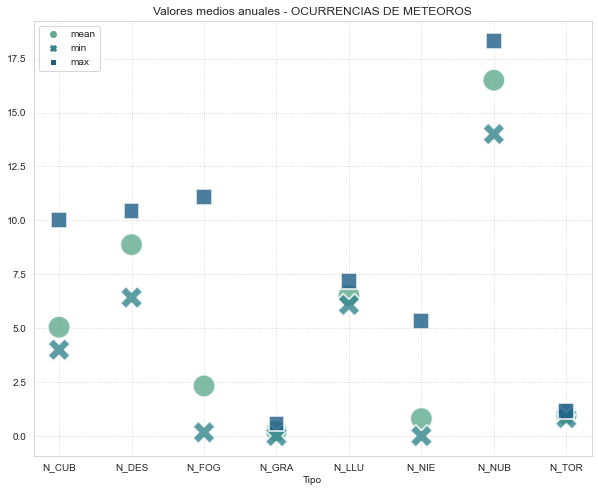

In [91]:
# scatter plot, me quedo con la media, min, max

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_title("Valores medios anuales - OCURRENCIAS DE METEOROS");

sns.scatterplot(data=df_statistics_met[["mean","min","max"]], palette="crest", marker= "o", s= 500, alpha=0.8 );

plt.legend(loc="upper left");

## guardo el grafico


## medias anuales TEMPERATURAS

In [94]:
##CARGO EL DATAFRAME
temper_all = pd.read_csv("..\\temper_all.csv")
temper_all.head(10)

,Indicativo,NOMBRE,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,media anual,Tipo
0,3191E,COLMENAR VIEJO/FAMET,6.4,8.4,10.4,9.9,15.9,20.7,25.3,23.9,19.6,14.8,7.3,7.9,14.2,TM_MES
1,3129,MADRID/BARAJAS,5.7,7.8,11.2,12.5,18.3,23.1,27.5,25.8,21.1,16.1,10.2,8.5,15.7,TM_MES
2,3196,MADRID/CUATRO VIENTOS,6.8,9.2,12.2,12.6,18.7,23.4,27.6,26.1,21.5,16.4,9.8,9.0,16.1,TM_MES
3,3200,MADRID/GETAFE,6.5,9.2,12.4,12.7,19.2,23.8,28.1,26.4,21.9,16.7,10.3,9.0,16.4,TM_MES
4,3195,"MADRID,RETIRO",6.5,9.4,12.4,12.6,18.9,23.7,28.0,26.1,21.2,16.2,9.6,8.8,16.1,TM_MES
5,3175,MADRID/TORREJÓN,5.4,7.8,10.9,11.9,17.6,22.5,27.2,25.5,21.2,15.8,9.8,8.1,15.3,TM_MES
6,2462,"NAVACERRADA,PUERTO",1.2,3.4,4.7,3.3,9.8,14.0,18.7,17.8,13.8,9.7,0.9,3.7,8.4,TM_MES
7,3191E,COLMENAR VIEJO/FAMET,10.5,12.9,15.7,14.6,22.5,26.8,31.4,29.8,24.8,19.2,10.3,11.2,19.1,TM_MAX
8,3129,MADRID/BARAJAS,12.7,16.1,19.3,18.5,26.6,31.2,35.5,33.7,27.9,22.6,13.8,13.0,22.6,TM_MAX
9,3196,MADRID/CUATRO VIENTOS,12.6,15.5,18.6,18.1,25.9,30.3,34.5,32.9,27.5,22.1,13.3,13.1,22.0,TM_MAX


In [95]:
##uso todos los valores menos NT_30 y NT_00, que son en nºdias (el resto es todo en ºC)
#estos son los valores estadísticos de  cada uno de los datos de precipitaciones
df_statistics_temp= temper_all.groupby("Tipo")["media anual"].describe()
df_statistics_temp

,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
NT_00,7.0,3.475714,3.304859,0.75,1.335,1.83,4.500,10.08
NT_30,7.0,5.677143,2.623279,0.25,5.415,6.58,7.290,7.50
TA_MAX,7.0,27.004286,3.051693,20.56,26.705,28.48,28.760,29.06
TA_MIN,7.0,3.247143,3.029003,-2.99,2.930,3.29,5.320,5.93
TI_MAX,7.0,12.880000,4.210922,3.81,12.945,14.88,15.115,15.35
TM_MAX,7.0,20.357143,3.582763,12.70,20.250,22.00,22.350,22.60
TM_MES,7.0,14.600000,2.829605,8.40,14.750,15.70,16.100,16.40
TM_MIN,7.0,8.785714,2.329112,4.00,8.400,9.20,10.350,10.80
TS_MIN,7.0,14.525714,1.677676,10.96,14.405,15.14,15.445,15.88


In [96]:
##para el grafico me quedo con media, min, max de todos menos NT_00 y NT_30
stats_temp = df_statistics_temp[["mean","min","max"]]
stats_temp[2:]

,mean,min,max
Tipo,,,
TA_MAX,27.004286,20.56,29.06
TA_MIN,3.247143,-2.99,5.93
TI_MAX,12.880000,3.81,15.35
TM_MAX,20.357143,12.70,22.60
TM_MES,14.600000,8.40,16.40
TM_MIN,8.785714,4.00,10.80
TS_MIN,14.525714,10.96,15.88


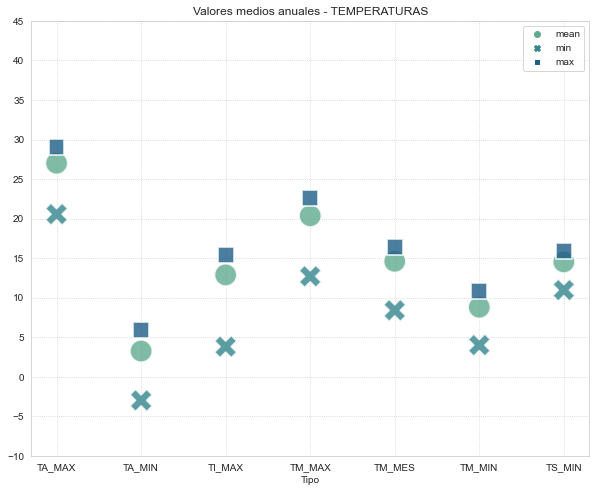

In [97]:
# voy a hacer el mismo scatter plot de las temperaturas con unidad de medida en ºC)

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

ax.set_title("Valores medios anuales - TEMPERATURAS");

ticks = range(-10, 50, 5)

sns.scatterplot(data=stats_temp[2:], palette="crest", marker= "o", s= 500, alpha=0.8);
plt.yticks(ticks)
plt.legend(loc="upper right");

## guardo el grafico